In [48]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import scipy.special
from collections import namedtuple

In [49]:
def initial(x):
    return np.exp(-2.*np.cos(2.*np.pi*x))

def deriv(x):
    return 4*np.pi*np.sin(2*np.pi*x)*np.exp(-2.*np.cos(2.*np.pi*x))

def err(u, uanaly):
    e = 0.
    for i in np.arange(u.size):
        e = e + (u[i]-uanaly[i])**2.
    e = (e/u.size)**0.5
    return e

def sx(x, T):
    shifted = x + T*np.ones(x.size)
    return shifted

def FD(u):
    N = u.size
    du = np.zeros(N)
    for i in np.arange(u.size-1):
        du[i] = N*(u[i+1]-u[i-1])/2.
    du[-1] = N*(u[0] - u[-2])/2.
    return du

def SpecDeriv(u):
    n = u.size
    su = np.fft.rfft(u, n)
    dsu = su
    for i in np.arange(su.size):
        dsu[i] = -2.*np.pi*1j*i*su[i]
    return -np.fft.irfft(dsu, n)

def FE_Step(u, F, h):
    return u + h*F(u)

def RK2(u, F, h):
    w1 = F(u)
    w2 = F(u+0.5*h*w1)
    return u + h*w2

def RK4(u, F, h):
    k1 = F(u)
    k2 = F(u+(h/2.)*k1)
    k3 = F(u+(h/2.)*k2)
    k4 = F(u+h*k3)
    return u + (h/6.)*(k1+2.*k2+2.*k3+k4)

def Evolve(t, T_final, u, F, Tstepper, CF, info):
    dx = info.dx
    dt = CF*dx
    while t < T_final:
        u = Tstepper(u, F, dt)
        t = t + dt
    return u, t

FD_Info_t = namedtuple('FD_Info_t', 'dx, x')

In [50]:
Np = np.array([20, 40, 80, 160, 320, 640])
error = np.zeros(Np.size)
for i in np.arange(Np.size):
    N = Np[i]
    x = np.linspace(0., 1., N, endpoint=False)
    u = initial(x)
    du = FD(u)
    error[i] = err(du, deriv(x))

Text(0.5, 1.0, '2nd order FD')

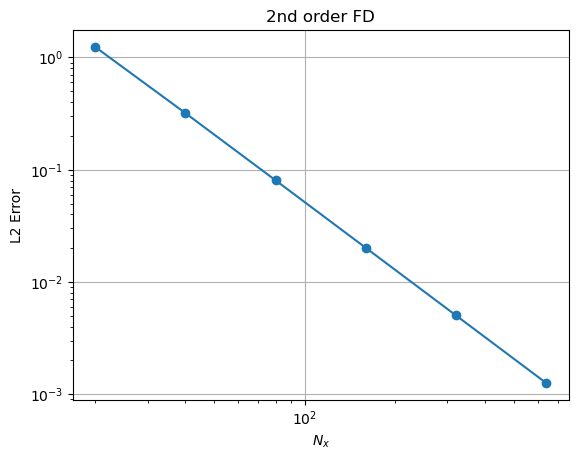

In [51]:
plt.plot(Np, error, '-o')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$N_{x}$")
plt.ylabel("L2 Error")
plt.grid()
plt.title("2nd order FD")

In [52]:
Np = np.array([20, 40, 80, 160, 320, 640])
CFp = 2.*np.ones(9)
for i in np.arange(CFp.size):
    CFp[i] = CFp[i]**(-i)
error = np.zeros([Np.size, CFp.size])
for i in np.arange(Np.size):
    for j in np.arange(CFp.size):
        N = Np[i]
        CF = CFp[j]
        info = FD_Info_t(dx = 1./N, x = np.linspace(0., 1., N, endpoint=False))
        u = initial(info.x)
        uf, tf = Evolve(0., 1., u, FD, FE_Step, CF, info)
        error[i,j] = err(uf, initial(sx(info.x, tf)))

Text(0.5, 1.0, 'FD, FE')

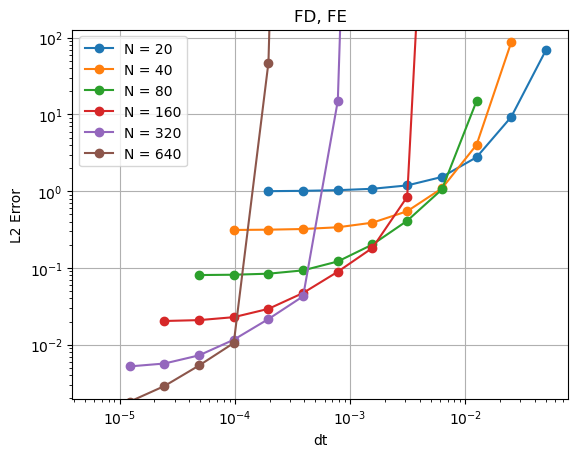

In [53]:
for i in np.arange(Np.size):
    plt.plot(CFp/Np[i], error[i,:], 'o-', label = f"N = {Np[i]}")
plt.ylim([2**-9, 2**7])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("dt")
plt.ylabel("L2 Error")
plt.legend()
plt.grid()
plt.title("FD, FE")

In [54]:
Np = np.array([20, 40, 80, 160, 320, 640])
CFp = 2.*np.ones(5)
for i in np.arange(CFp.size):
    CFp[i] = CFp[i]**(1-i)
error = np.zeros([Np.size, CFp.size])
for i in np.arange(Np.size):
    for j in np.arange(CFp.size):
        N = Np[i]
        CF = CFp[j]
        info = FD_Info_t(dx = 1./N, x = np.linspace(0., 1., N, endpoint=False))
        u = initial(info.x)
        uf, tf = Evolve(0., 1., u, FD, RK4, CF, info)
        error[i,j] = err(uf, initial(sx(info.x, tf)))

Text(0.5, 1.0, 'FD, RK4')

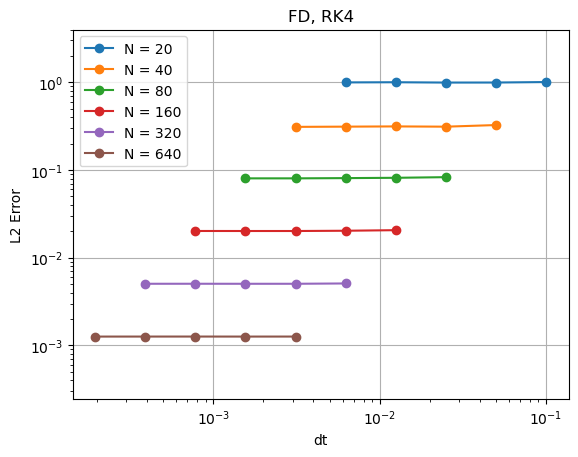

In [55]:
for i in np.arange(Np.size):
    plt.plot(CFp/Np[i], error[i,:], 'o-', label = f"N = {Np[i]}")
plt.ylim([2**-12, 2**2])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("dt")
plt.ylabel("L2 Error")
plt.legend()
plt.grid()
plt.title("FD, RK4")

In [56]:
Np = np.array([20, 40, 80, 160, 320, 640])
CFp = 2.*np.ones(7)
for i in np.arange(CFp.size):
    CFp[i] = CFp[i]**(-i)
error = np.zeros([Np.size, CFp.size])
for i in np.arange(Np.size):
    for j in np.arange(CFp.size):
        N = Np[i]
        CF = CFp[j]
        info = FD_Info_t(dx = 1./N, x = np.linspace(0., 1., N, endpoint=False))
        u = initial(info.x)
        uf, tf = Evolve(0., 1., u, FD, RK2, CF, info)
        error[i,j] = err(uf, initial(sx(info.x, tf)))

Text(0.5, 1.0, 'FD, RK2')

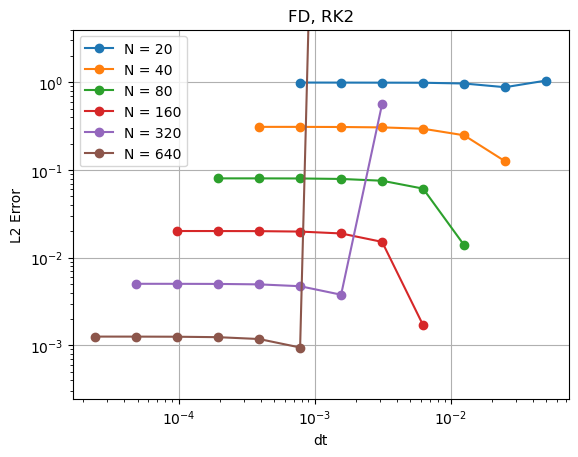

In [57]:
for i in np.arange(Np.size):
    plt.plot(CFp/Np[i], error[i,:], 'o-', label = f"N = {Np[i]}")
plt.ylim([2**-12, 2**2])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("dt")
plt.ylabel("L2 Error")
plt.legend()
plt.grid()
plt.title("FD, RK2")

In [58]:
Np = np.array([4, 8, 12, 16, 20, 24, 28, 32])
CFp = 2.*np.ones(11)
for i in np.arange(CFp.size):
    CFp[i] = CFp[i]**(-i)
error = np.zeros([Np.size, CFp.size])
for i in np.arange(Np.size):
    for j in np.arange(CFp.size):
        N = Np[i]
        CF = CFp[j]
        info = FD_Info_t(dx = 1./N, x = np.linspace(0., 1., N, endpoint=False))
        u = initial(info.x)
        uf, tf = Evolve(0., 1.02, u, SpecDeriv, RK4, CF, info)
        error[i,j] = err(uf, initial(sx(info.x, tf)))

Text(0.5, 1.0, 'Pseudo-Spectral, RK4')

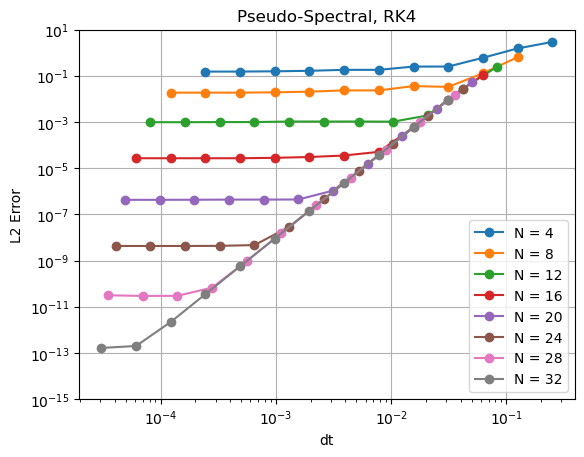

In [59]:
for i in np.arange(Np.size):
    plt.plot(CFp/Np[i], error[i,:], 'o-', label = f"N = {Np[i]}")
plt.xscale("log")
plt.yscale("log")
plt.ylim([10**-15, 10**1])
plt.xlabel("dt")
plt.ylabel("L2 Error")
plt.legend()
plt.grid()
plt.title("Pseudo-Spectral, RK4")